In [28]:
#Importação de Bibliotecas
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [29]:
#Carregar Dataframe
df = pd.read_csv("./data.csv")

  <img src="theraBankLogo.png" alt="Logo Thera Bank" align="left" width="180">

# Thera Bank
A administração do Thera Bank pretende explorar formas de converter os seus clientes passivos em clientes de empréstimos pessoais (mantendo-os como depositantes). Uma campanha que o banco realizou no ano passado para clientes passivos mostrou uma taxa de conversão saudável de mais de 9% de sucesso. Isso encorajou o departamento de marketing de varejo a elaborar campanhas com melhor marketing direcionado para aumentar a taxa de sucesso com um orçamento mínimo.


### Base de dados:

ID: Id do cliente

Age: idade dos clientes

Experience: anos de experiência profissional

Income: Renda anual do cliente

ZIP Code: CEP 

Family: tamanho da familia

CCAvg: Média gastos com cartão de crédito por mês (em milhares de dólares (USD))

Education: Nível educacional (graduação = 1, pós-graduação = 2, avanço = 3)

Personal Loan: Este cliente aceitou o empréstimo pessoal oferecido na última campanha?

Securities Account: O cliente possui uma conta de investimentos no banco?

CD Account: O cliente possui uma conta de CDB no banco?

Online: O cliente utiliza serviços de internet banking

CreditCard: o cliente tem cartão de crédito?

In [30]:
#Informações do Dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   ID                  5000 non-null   int64 
 1   Age                 5000 non-null   int64 
 2   Experience          5000 non-null   int64 
 3   Income              5000 non-null   int64 
 4   ZIP Code            5000 non-null   int64 
 5   Family              5000 non-null   int64 
 6   CCAvg               5000 non-null   object
 7   Education           5000 non-null   int64 
 8   Mortgage            5000 non-null   int64 
 9   Personal Loan       5000 non-null   int64 
 10  Securities Account  5000 non-null   int64 
 11  CD Account          5000 non-null   int64 
 12  Online              5000 non-null   int64 
 13  CreditCard          5000 non-null   int64 
dtypes: int64(13), object(1)
memory usage: 547.0+ KB


## Tratamento da base de dados

In [31]:
# Trocar a "/" por "." e converter para float
df["CCAvg"] = df["CCAvg"].str.replace("/", ".", regex=False).astype(float)

## Perguntas

### Perfil demográfico dos clientes
1. Qual a média e mediana de idade dos clientes? (Luciano)


In [32]:
#Luciano - Resposta Questão 1

2. Existe diferença de renda média entre os diferentes níveis de escolaridade? (Luciano)

In [33]:
#Luciano - Resposta Questão 2

3. Qual a distribuição de tamanho das famílias? (Luciano)

In [34]:
#Luciano - Resposta Questão 3

### Relação com o empréstimo pessoal
4. Qual a porcentagem de clientes que aceitaram o **Personal Loan**? (Dieni)

4. Porcentagem de aceitação: 9.60%


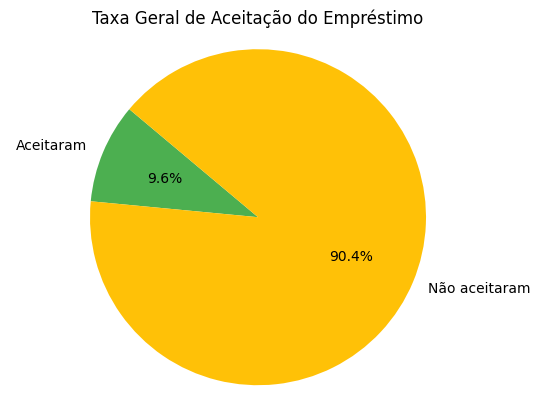

In [35]:
# Dieni - Resposta Questão 4

# 4. Porcentagem de clientes que aceitaram o Personal Loan
aceitaram = df['Personal Loan'].sum()
total = len(df)
porcentagem_aceitacao = (aceitaram / total) * 100
print(f"4. Porcentagem de aceitação: {porcentagem_aceitacao:.2f}%")

# Supondo que 9.6% aceitaram
labels = ['Aceitaram', 'Não aceitaram']
sizes = [9.6, 100 - 9.6]
colors = ['#4CAF50', '#FFC107']

plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Taxa Geral de Aceitação do Empréstimo')
plt.axis('equal')
plt.show()

5. A taxa de aceitação varia de acordo com o nível de educação? (Dieni)


5. Taxa de aceitação por nível de educação:
Education
1     4.437023
2    12.972202
3    13.657562
Name: Personal Loan, dtype: float64


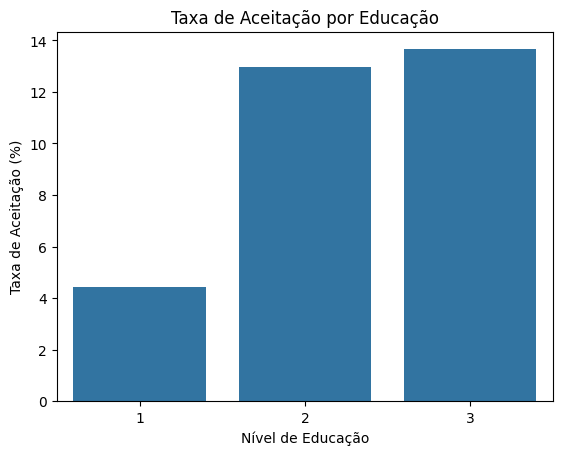

In [36]:
# Dieni - Resposta Questão 5

# 5. Taxa de aceitação por nível de educação
taxa_por_educacao = df.groupby('Education')['Personal Loan'].mean() * 100
print("\n5. Taxa de aceitação por nível de educação:")
print(taxa_por_educacao)

# Visualização
sns.barplot(x=taxa_por_educacao.index, y=taxa_por_educacao.values)
plt.title("Taxa de Aceitação por Educação")
plt.xlabel("Nível de Educação")
plt.ylabel("Taxa de Aceitação (%)")
plt.show()

6. Existe correlação entre renda anual e aceitação do empréstimo? (Dieni)


6. Correlação entre renda anual e aceitação: 0.50


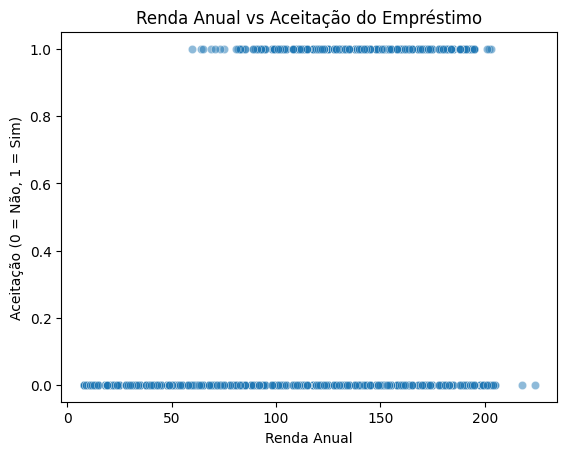

In [37]:
# Dieni - Resposta Questão 6

# 6. Correlação entre renda anual e aceitação do empréstimo
correlacao = df['Income'].corr(df['Personal Loan'])
print(f"\n6. Correlação entre renda anual e aceitação: {correlacao:.2f}")

sns.scatterplot(data=df, x='Income', y='Personal Loan', alpha=0.5)
plt.title('Renda Anual vs Aceitação do Empréstimo')
plt.xlabel('Renda Anual')
plt.ylabel('Aceitação (0 = Não, 1 = Sim)')
plt.show()


7. Clientes com maior **CCAvg** (gasto no cartão) têm maior probabilidade de aceitar o empréstimo? (Paulo)

Média de gasto no cartão por grupo (em milhares USD):
Personal Loan
0    1.729009
1    3.905354
Name: CCAvg, dtype: float64


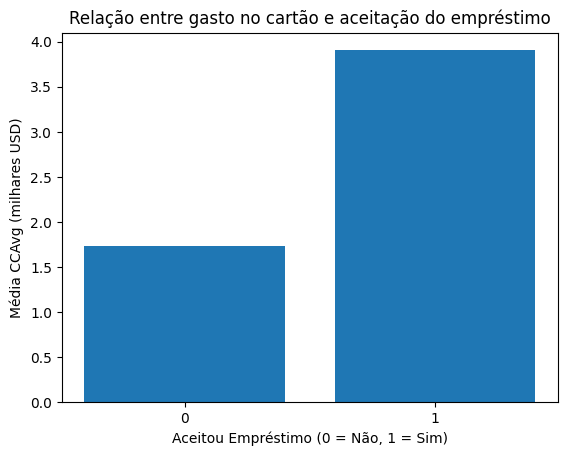

In [38]:
# Paulo - Resposta Questão 7

# Agrupando por aceitação de empréstimo
resultado = df.groupby('Personal Loan')['CCAvg'].mean()


print("Média de gasto no cartão por grupo (em milhares USD):")
print(resultado)


# Visualização
plt.bar(resultado.index.astype(str), resultado.values)
plt.xlabel("Aceitou Empréstimo (0 = Não, 1 = Sim)")
plt.ylabel("Média CCAvg (milhares USD)")
plt.title("Relação entre gasto no cartão e aceitação do empréstimo")
plt.show()

# Sim, clientes com maior gasto médio no cartão de crédito (CCAvg) têm maior probabilidade de aceitar o empréstimo pessoal.


### Produtos e serviços bancários
8. Clientes que têm CD Account aceitaram mais empréstimos que os que não têm? (Paulo)

Taxa de aceitação de empréstimo por posse de CD Account:
CD Account
0    0.072371
1    0.463576
Name: Personal Loan, dtype: float64


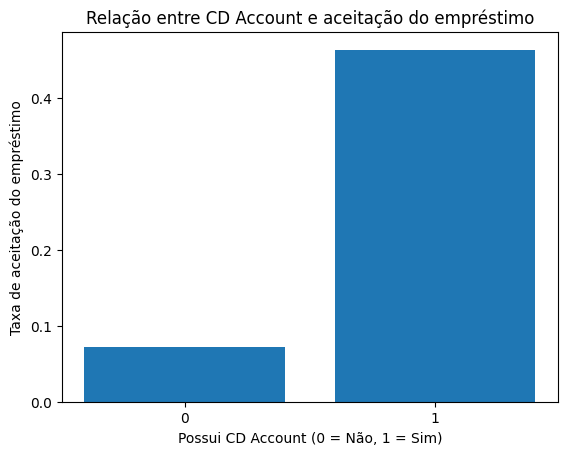

In [39]:
# Paulo - Resposta Questão 8

# Agrupando por CD Account e calculando taxa de aceitação
resultado_cd = df.groupby('CD Account')['Personal Loan'].mean()


print("Taxa de aceitação de empréstimo por posse de CD Account:")
print(resultado_cd)


# Visualização
plt.bar(resultado_cd.index.astype(str), resultado_cd.values)
plt.xlabel("Possui CD Account (0 = Não, 1 = Sim)")
plt.ylabel("Taxa de aceitação do empréstimo")
plt.title("Relação entre CD Account e aceitação do empréstimo")
plt.show()

# Clientes sem CD Account (CD Account = 0)

# Taxa de aceitação ≈ 7,2%.

# Clientes com CD Account (CD Account = 1)

# Taxa de aceitação ≈ 46,3%.

# A diferença é enorme: quase 6,5 vezes maior.

# Indica que o produto “CD Account” é um dos preditores mais fortes para aceitação de empréstimo.

# Explicação provável: clientes que já possuem CDB têm relacionamento financeiro mais profundo com o banco, maior confiança e familiaridade com produtos de crédito.


9. O uso de internet banking (Online) influencia na adesão ao empréstimo? (Fernando Augusto)


In [40]:
# Fernando Augusto - Resposta Questão 9

# 2. Teste Qui-Quadrado (associação simples)
contingencia = pd.crosstab(df['usa_internet_banking'], df['aderiu_emprestimo'])
chi2, p, dof, expected = chi2_contingency(contingencia)

print("=== Teste Qui-Quadrado ===")
print("Qui²:", chi2)
print("p-valor:", p)
if p < 0.05:
    print("Há evidência de associação entre uso de internet banking e adesão ao empréstimo.")
else:
    print("Não há evidência de associação.")

# 3. Regressão logística (controlando por idade e renda)
X = df[['usa_internet_banking', 'idade', 'renda']]
X = sm.add_constant(X)  # adiciona intercepto
y = df['aderiu_emprestimo']

modelo = sm.Logit(y, X).fit()
print(modelo.summary())

"""
Coeficiente (uso_ib):

Se for positivo e com p-valor < 0,05 → usar internet banking aumenta a chance de adesão.

Se for negativo → diminui a chance.
Odds Ratio (uso_ib):
> 1 → aumenta as chances.
< 1 → reduz as chances.
Ex.: OR = 2,2 significa que quem usa internet banking tem 120% mais chances de aderir ao empréstimo, controlando por idade e renda.
Intervalo de confiança (IC):
Se não incluir 1 → efeito estatisticamente significativo.

"""

KeyError: 'usa_internet_banking'


10. Quem já tem cartão de crédito do banco também tem maior chance de aceitar empréstimo? (Fernando Augusto)


In [41]:
# Fernando Augusto - Resposta Questão 10

# 1. Gerar banco de dados fictício
np.random.seed(42)
n = 500  # número de clientes

# Variáveis independentes
idade = np.random.randint(18, 70, n)
renda = np.random.normal(4000, 1500, n).clip(1000, None)  # renda mínima 1000
tem_cartao = np.random.binomial(1, 0.65, n)  # 65% têm cartão de crédito do banco

# Gerar probabilidade de aceitar empréstimo
# Aqui simulamos que ter cartão aumenta a chance
log_odds = -2 + 1.0*tem_cartao + 0.015*(idade - 40) + 0.00025*(renda - 4000)
prob = 1 / (1 + np.exp(-log_odds))

# Variável dependente
aceitou_emprestimo = np.random.binomial(1, prob)

# Criar DataFrame
df = pd.DataFrame({
    "idade": idade,
    "renda": renda,
    "tem_cartao": tem_cartao,
    "aceitou": aceitou_emprestimo
})

print("Amostra dos dados:")
print(df.head())

# 2. Rodar regressão logística
X = sm.add_constant(df[["tem_cartao", "idade", "renda"]])
y = df["aceitou"]

modelo = sm.Logit(y, X).fit()
print(modelo.summary())

# 3. Calcular Odds Ratio e Intervalo de Confiança
params = modelo.params
conf = modelo.conf_int()
odds_ratios = np.exp(params)
conf_odds = np.exp(conf)

resultado = pd.DataFrame({
    "Coeficiente": params,
    "Odds Ratio": odds_ratios,
    "IC 2.5%": conf_odds[0],
    "IC 97.5%": conf_odds[1],
    "p-valor": modelo.pvalues
})

print("\n=== Interpretação com Odds Ratio ===")
print(resultado)

"""
Variável principal: tem_cartao

Coeficiente positivo → indica que ter cartão aumenta a probabilidade de aceitar empréstimo.

p-valor < 0,05 → efeito estatisticamente significativo.

Odds Ratio (OR) > 1 → aumenta as chances.

Ex.: OR = 2,7 → quem tem cartão tem 170% mais chances de aceitar empréstimo, controlando por idade e renda.

Variáveis de controle: idade e renda

Servem para isolar o efeito do cartão, evitando confundimento.
"""


Amostra dos dados:
   idade        renda  tem_cartao  aceitou
0     56  7183.234296           0        1
1     69  5548.697891           1        0
2     46  1720.945051           1        1
3     32  3273.648891           1        0
4     60  5900.366724           0        0


NameError: name 'sm' is not defined

## Insights financeiros

11. Qual é a renda média dos clientes que aceitaram a oferta de empréstimo em comparação com os que recusaram? (Fernando Aires)

In [43]:
# Fernando Aires - Resposta Questão 11
df_analise = df.copy()

# Renomear as colunas
df_analise.rename(columns={'Personal Loan': 'Aceitou_Emprestimo', 'Income': 'Renda'}, inplace=True)

# Agrupar os dados pela coluna 'Aceitou_Emprestimo' (1 = sim, 0 = não)
# e calcular a média da 'Renda' para cada grupo.
renda_media = df_analise.groupby('Aceitou_Emprestimo')['Renda'].mean()

print("=====================================================================================")
print("Renda média dos clientes que aceitaram vs. não aceitaram o empréstimo")
print("=====================================================================================")
print(f"Renda média dos clientes que NÃO aceitaram o empréstimo (0): ${renda_media[0]:.2f} mil")
print(f"Renda média dos clientes que ACEITARAM o empréstimo (1):    ${renda_media[1]:.2f} mil")
print("\nObservação: A unidade da renda no dataframe é em milhares de dólares (por exemplo, 49 significa $49.000).")
print("=====================================================================================\n")

KeyError: 'Aceitou_Emprestimo'

12. A posse de uma conta de títulos (Securities Account) tem uma influência significativa na taxa de aceitação de empréstimos? (Fernando Aires)

In [ ]:
# Fernando Aires - Resposta Questão 12

# Criar uma tabela de contingência para o teste Chi-quadrado
tabela_contingencia = pd.crosstab(df_analise['Securities Account'], df_analise['Aceitou_Emprestimo'])

print("Tabela de Contingência:")
print(tabela_contingencia)

# Realizar o teste de qui-quadrado (Chi-squared test)
# H0 (Hipótese Nula): Não há relação entre ter uma conta de títulos e a aceitação do empréstimo.
# Ha (Hipótese Alternativa): Há uma relação significativa entre ter uma conta de títulos e a aceitação do empréstimo.
chi2_stat, p_valor, dof, ex = stats.chi2_contingency(tabela_contingencia)

print(f"\nEstatística do Qui-quadrado (Chi-square): {chi2_stat:.4f}")
print(f"Valor-p (p-value): {p_valor:.4f}")

# Interpretar o resultado com base no valor-p (usando um nível de significância de 0.05)
nivel_significancia = 0.05
print("\nConclusão:")
if p_valor < nivel_significancia:
    print(f"Como o valor-p ({p_valor:.4f}) é menor que 0.05, podemos rejeitar a hipótese nula.")
    print("Isso sugere que existe uma diferença estatisticamente significativa na taxa de aceitação de empréstimos entre os clientes que possuem e os que não possuem uma 'Securities Account'.")
else:
    print(f"Como o valor-p ({p_valor:.4f}) é maior que 0.05, não podemos rejeitar a hipótese nula.")
    print("Não há evidências suficientes para afirmar que existe uma diferença estatisticamente significativa na taxa de aceitação entre os grupos.")
    
print("\nAnálise das taxas de aceitação para contexto:")
taxas_aceitacao = df_analise.groupby('Securities Account')['Aceitou_Emprestimo'].mean() * 100
print(f"Taxa de aceitação entre clientes SEM 'Securities Account' (0): {taxas_aceitacao[0]:.2f}%")
print(f"Taxa de aceitação entre clientes COM 'Securities Account' (1): {taxas_aceitacao[1]:.2f}%")
print("=====================================================================================")

Tabela de Contingência:
Aceitou_Emprestimo     0    1
Securities Account           
0                   4058  420
1                    462   60

Estatística do Qui-quadrado (Chi-square): 2.1723
Valor-p (p-value): 0.1405

Conclusão:
Como o valor-p (0.1405) é maior que 0.05, não podemos rejeitar a hipótese nula.
Não há evidências suficientes para afirmar que existe uma diferença estatisticamente significativa na taxa de aceitação entre os grupos.

Análise das taxas de aceitação para contexto:
Taxa de aceitação entre clientes SEM 'Securities Account' (0): 9.38%
Taxa de aceitação entre clientes COM 'Securities Account' (1): 11.49%



13. Famílias maiores tendem a aceitar mais ou menos o empréstimo? (Warlley)


In [ ]:
# Warlley - Resposta Questão 13

# Calcular a taxa de aceitação de empréstimo por tamanho de família
loan_by_family = df.groupby('Family')['Personal Loan'].mean() * 100

# Exibir os resultados
print("Taxa de Aceitação de Empréstimo por Tamanho de Família:")
print(loan_by_family)

# Análise adicional para melhor visualização
# Contar o número de empréstimos aceitos e recusados por tamanho de família
family_loan_counts = df.groupby('Family')['Personal Loan'].value_counts().unstack(fill_value=0)

# Renomear as colunas para melhor clareza
family_loan_counts.columns = ['Recusou', 'Aceitou']

# Adicionar a taxa de aceitação ao dataframe
family_loan_counts['Taxa de Aceitação (%)'] = loan_by_family

print("\nNúmero de Empréstimos Aceitos e Recusados por Tamanho de Família:")
print(family_loan_counts)

# Conclusão
maior_taxa = loan_by_family.idxmax()
menor_taxa = loan_by_family.idxmin()

print(f"\nA maior taxa de aceitação de empréstimos é para famílias com {maior_taxa} membros.")
print(f"A menor taxa de aceitação de empréstimos é para famílias com {menor_taxa} membros.")

Taxa de Aceitação de Empréstimo por Tamanho de Família:
Family
1     7.269022
2     8.179012
3    13.168317
4    10.965630
Name: Personal Loan, dtype: float64

Número de Empréstimos Aceitos e Recusados por Tamanho de Família:
        Recusou  Aceitou  Taxa de Aceitação (%)
Family                                         
1          1365      107               7.269022
2          1190      106               8.179012
3           877      133              13.168317
4          1088      134              10.965630

A maior taxa de aceitação de empréstimos é para famílias com 3 membros.
A menor taxa de aceitação de empréstimos é para famílias com 1 membros.



### Análises avançadas / preditivas 
14. Quais variáveis têm maior correlação com a variável alvo Personal Loan? (Warlley)


In [ ]:
# Warlley

# Calcular correlações com a variável alvo
df.info()
# correlations = df.corr(numeric_only=True)["Personal Loan"].sort_values(ascending=False)
# print(correlations)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Renda               5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Aceitou_Emprestimo  5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB



15. É possível segmentar os clientes em grupos com alta chance de conversão? (Francisco)
    


In [ ]:
# Francisco

# identificar padrões entre os clientes que aceitaram o empréstimo (“Personal Loan” = 1)
variaveis = ["Income", "CCAvg", "Education", "Family", "Mortgage"]
grouped = df.groupby("Personal Loan")[variaveis].mean().T
print("\nMédia Taxa de aceitação:")
print(grouped)

taxa_familia = df.groupby("Family")["Personal Loan"].mean()
taxa_educacao = df.groupby("Education")["Personal Loan"].mean()

print("\nTaxa de aceitação por tamanho da família:")
print(taxa_familia)

print("\nTaxa de aceitação por nível de educação:")
print(taxa_educacao)


Média Taxa de aceitação:
Personal Loan          0           1
Income         66.237389  144.745833
CCAvg           1.729009    3.905354
Education       1.843584    2.233333
Family          2.373451    2.612500
Mortgage       51.789381  100.845833

Taxa de aceitação por tamanho da família:
Family
1    0.072690
2    0.081790
3    0.131683
4    0.109656
Name: Personal Loan, dtype: float64

Taxa de aceitação por nível de educação:
Education
1    0.044370
2    0.129722
3    0.136576
Name: Personal Loan, dtype: float64


<Figure size 1000x600 with 0 Axes>

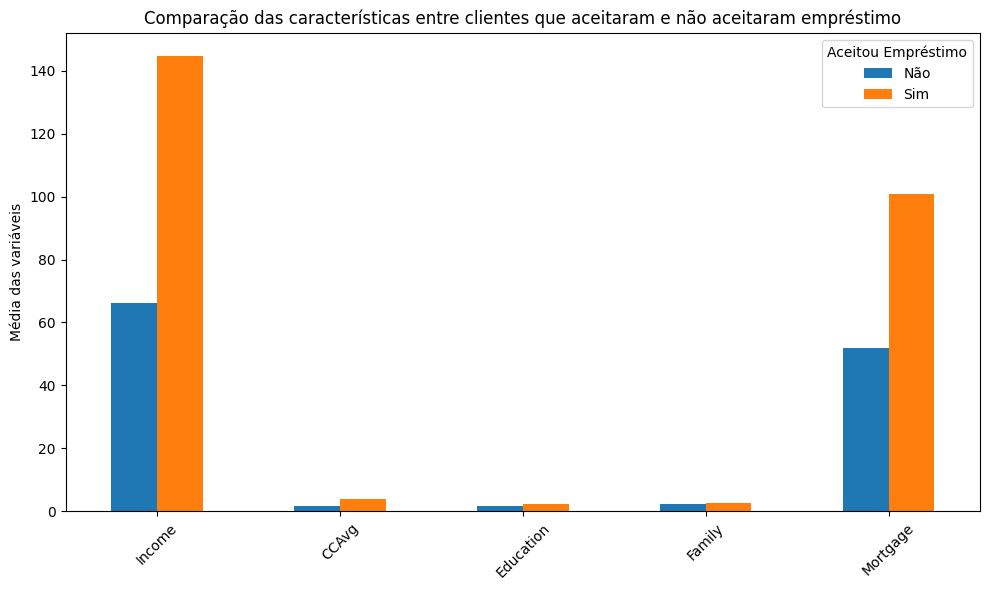

In [ ]:
plt.figure(figsize=(10,6))
grouped.plot(kind="bar", figsize=(10,6))
plt.title("Comparação das características entre clientes que aceitaram e não aceitaram empréstimo")
plt.ylabel("Média das variáveis")
plt.xticks(rotation=45)
plt.legend(title="Aceitou Empréstimo", labels=["Não", "Sim"])
plt.tight_layout()
plt.show()

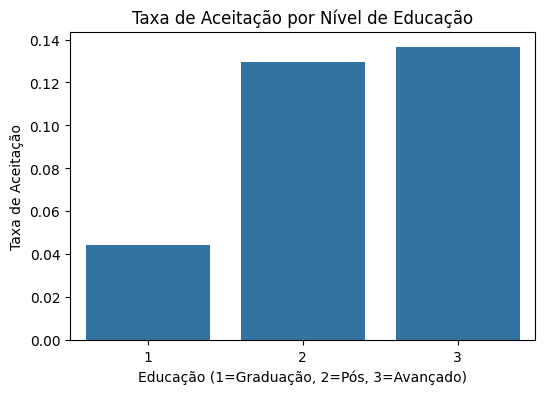

In [ ]:
plt.figure(figsize=(6,4))
sns.barplot(x=taxa_educacao.index, y=taxa_educacao.values)
plt.title("Taxa de Aceitação por Nível de Educação")
plt.xlabel("Educação (1=Graduação, 2=Pós, 3=Avançado)")
plt.ylabel("Taxa de Aceitação")
plt.show()

16. Quais faixas de renda e gastos em cartão são mais representativas entre os que aceitaram? (Francisco)


            Income        CCAvg
count  5000.000000  5000.000000
mean     73.774200     1.937938
std      46.033729     1.747659
min       8.000000     0.000000
25%      39.000000     0.700000
50%      64.000000     1.500000
75%      98.000000     2.500000
max     224.000000    10.000000


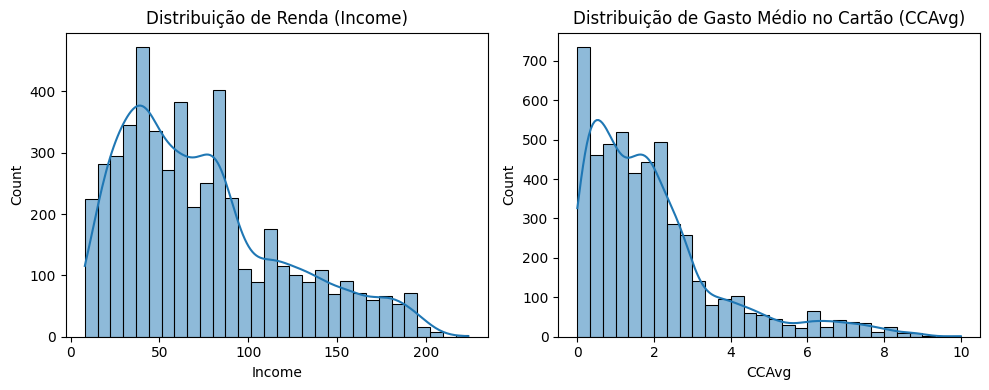

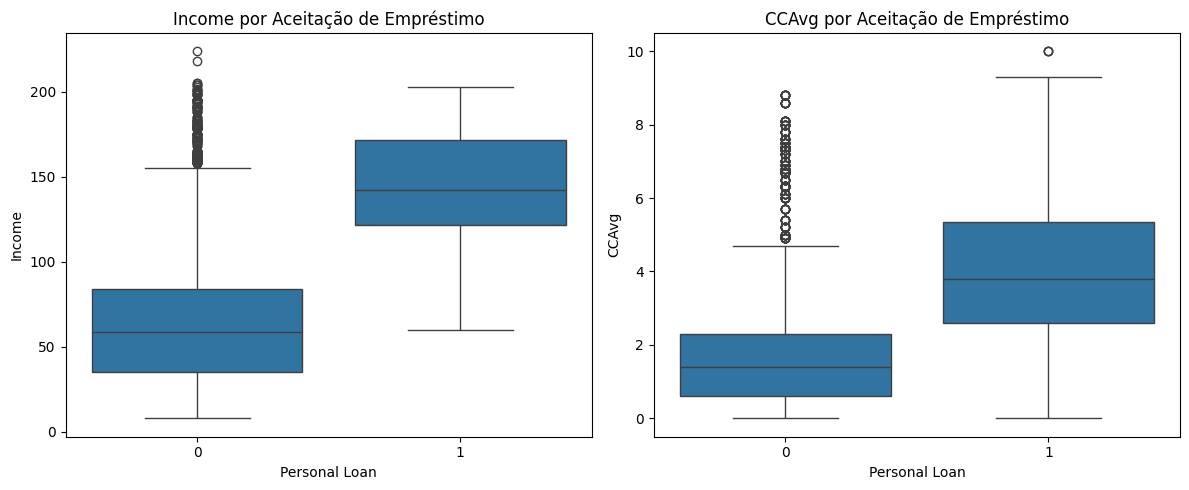

In [ ]:
# Criar faixas de renda e de gastos
print(df[["Income", "CCAvg"]].describe())

plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.histplot(df["Income"], bins=30, kde=True)
plt.title("Distribuição de Renda (Income)")

plt.subplot(1,2,2)
sns.histplot(df["CCAvg"], bins=30, kde=True)
plt.title("Distribuição de Gasto Médio no Cartão (CCAvg)")

plt.tight_layout()
plt.show()

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.boxplot(x="Personal Loan", y="Income", data=df)
plt.title("Income por Aceitação de Empréstimo")

plt.subplot(1,2,2)
sns.boxplot(x="Personal Loan", y="CCAvg", data=df)
plt.title("CCAvg por Aceitação de Empréstimo")

plt.tight_layout()
plt.show()

In [ ]:
# sem outiliers
def remove_outliers(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lim_inf = Q1 - 1.5 * IQR
    lim_sup = Q3 + 1.5 * IQR
    return df[(df[col] >= lim_inf) & (df[col] <= lim_sup)]

df_no_out = remove_outliers(df, "Income")
df_no_out = remove_outliers(df_no_out, "CCAvg")


In [ ]:
# criando faixas
df_no_out["Income_bin"] = pd.qcut(df_no_out["Income"], q=4, labels=["Baixa", "Média-baixa", "Média-alta", "Alta"])
df_no_out["CCAvg_bin"] = pd.qcut(df_no_out["CCAvg"], q=4, labels=["Baixo", "Médio-baixo", "Médio-alto", "Alto"])


income_accept = df_no_out.groupby("Income_bin",observed=False)["Personal Loan"].mean()
cc_accept = df_no_out.groupby("CCAvg_bin",observed=False)["Personal Loan"].mean()

print("\nTaxa de aceitação por faixa de renda (sem outliers):")
print(income_accept)

print("\nTaxa de aceitação por faixa de gastos (sem outliers):")
print(cc_accept)


Taxa de aceitação por faixa de renda (sem outliers):
Income_bin
Baixa          0.000000
Média-baixa    0.000908
Média-alta     0.015762
Alta           0.269800
Name: Personal Loan, dtype: float64

Taxa de aceitação por faixa de gastos (sem outliers):
CCAvg_bin
Baixo          0.024390
Médio-baixo    0.033333
Médio-alto     0.028547
Alto           0.206709
Name: Personal Loan, dtype: float64


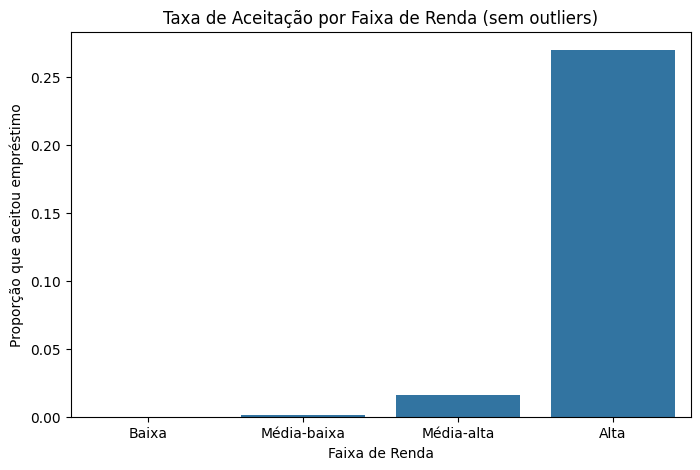

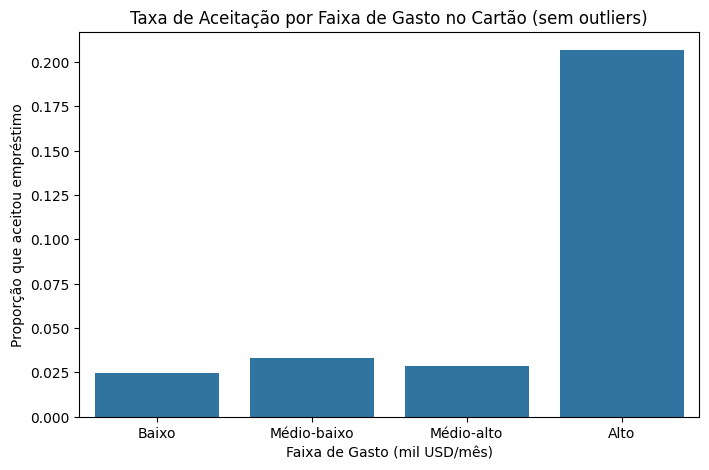

In [ ]:

plt.figure(figsize=(8,5))
sns.barplot(x=income_accept.index, y=income_accept.values)
plt.title("Taxa de Aceitação por Faixa de Renda (sem outliers)")
plt.ylabel("Proporção que aceitou empréstimo")
plt.xlabel("Faixa de Renda")
plt.show()

plt.figure(figsize=(8,5))
sns.barplot(x=cc_accept.index, y=cc_accept.values)
plt.title("Taxa de Aceitação por Faixa de Gasto no Cartão (sem outliers)")
plt.ylabel("Proporção que aceitou empréstimo")
plt.xlabel("Faixa de Gasto (mil USD/mês)")
plt.show()